<img src="python_ml_header.png" style="width:100%;height:400px"/>

In [1]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Train and Test Data 
cards = '/Users/egoretc/Desktop/'
cardsdf=  pd.read_csv(cards + 'creditcard.csv') 
cardsdf.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Preprocessing data, to make it ready for a model training.

In [3]:
Fraud = cardsdf[cardsdf['Class']==1]

Normal = cardsdf[cardsdf['Class']==0]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

I am going to test several algotithms and pick the best one which will classify the best according to confusion matrix. Confusion Matrix is the best metrics in this imbalanced data case. Accuracy will not tell true accuracy. First model algorithm is called Local Outlier Factor.

# IsolationForest

In [5]:
from sklearn.ensemble import IsolationForest

# Define a random state 
state = np.random.RandomState(42)
    
clf = IsolationForest(n_estimators=1000, max_samples=len(X), 
                                       random_state=state, verbose=1).fit(X)
y_pred = clf.predict(X)
# Run Classification Metrics

y_pred = pd.Series([0 if y_pred[i] <= 0.5 else 1 for i in range(len(y_pred))])
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished


array([[   401, 283914],
       [   175,    317]], dtype=int64)

Isolation Forest classifaied 283914 of Normal transactions as Fraud transactions. It is too bad and too poor accuracy classifier. On the other hand, it detected 317 Fraud transactions as Fraud which is good enough for  anomaly detection model.

# Support Vector Machine

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

In [7]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X,Y)
preds = clf.predict(X)
y_pred_temp = [0 if preds[i] <= 0.5 else 1 for i in range(len(preds))]

from sklearn.metrics import fbeta_score

print(fbeta_score(Y, y_pred_temp, average='weighted', beta=0.5))
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,y_pred_temp)

0.9996694424176729


array([[284305,     10],
       [    81,    411]], dtype=int64)

Sector Vector Machine performed very well on both,Fraud and Normal.Classification and Detection.

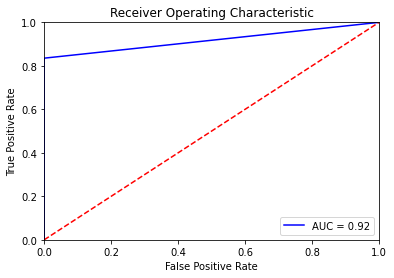

In [8]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, y_pred_temp)
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(Y, y_pred_temp)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This curve tells how good classification works. If a line is in the middle, meaning classification does not work at all. But in this model it works very well.

# KNeighborsClassifier

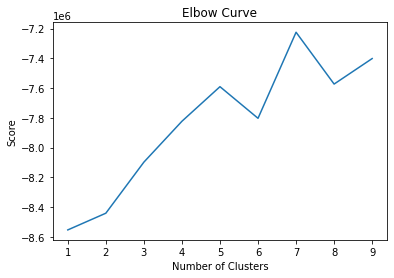

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])
from sklearn.cluster import MiniBatchKMeans
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

From this Elbow Curve I will try optimal number of clasters in my model.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
n_outliers = len(Fraud)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, Y)
preds = neigh.predict(X)
y_pred_temp = [0 if preds[i] <= 0.5 else 1 for i in range(len(preds))]

from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred_temp)

array([[284315,      0],
       [    98,    394]], dtype=int64)

Good. This algorithm works pretty well on this problem.So this algorithm is good candidate to use for this kinds of problems.

Next, is sloving the same problem but using different technologies called AUTOENCODER  from Neural Networks

# Autoencoder

<img src="autoencoder.jpg" style="width:100%;height:400px"/>

we will get a high reconstruction loss value because the network failed to reconstruct the image/input that is considered an anomaly.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardsdf_norm = scaler.fit_transform(cardsdf.drop(columns = 'Class'))
X = np.array(cardsdf_norm)
Y = np.array(cardsdf['Class'])

[[284038    277]
 [   352    140]]


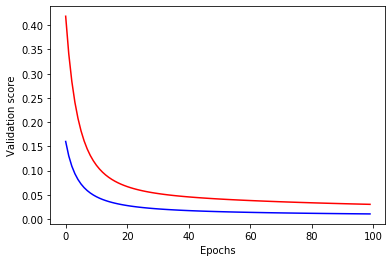

In [19]:
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError

model1 = Sequential()
# Add the first layer
model1.add(Dense(units = X.shape[1], activation='elu'))

# Add the second layer
model1.add(Dense(50, activation='elu'))

# Add the output layer
model1.add(Dense(1, activation='linear'))
my_optimizer = SGD(lr=0.001)
#Adadelta = keras.optimizers.Adadelta(lr=0.05, decay = 0.005)
# Compile the model
model1.compile(optimizer=my_optimizer, loss= MeanSquaredError(), metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
history1 = model1.fit(X, Y, batch_size = 10240, epochs = 100, verbose = False,validation_split=0.3,callbacks=[early_stopping_monitor])
# Calculate predictions: predictions
predictions1 = model1.predict(X)
# Calculate predicted probability of survival: predicted_prob_true
#predicted_prob_true1 =  predictions1[:,1]
y_pred_temp = [0 if predictions1[i] <= 0.5 else 1 for i in range(len(predictions1))]
#print(predicted_prob_true1)
model2 = Sequential()
# Add the first layer
model2.add(Dense(units = X.shape[1], activation='elu'))
    
# Add the second layer
model2.add(Dense(100, activation='elu'))
# Add the third layer
model2.add(Dense(100, activation='elu'))
model2.add(Dense(100, activation='elu'))
# Add the output layer
model2.add(Dense(1, activation='linear'))
my_optimizer = SGD(lr=0.001)
#Adadelta = keras.optimizers.Adadelta(lr=0.05, decay = 0.005)
# Compile the model
model2.compile(optimizer=my_optimizer, loss= MeanSquaredError(), metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=2)
# Verify that model contains information from compiling
#print("Loss function: " + model2.loss)
# Fit the model
history2 = model2.fit(X, Y, batch_size = 10240, epochs = 100, verbose = False,validation_split=0.3,callbacks=[early_stopping_monitor])
# Calculate predictions: predictions
predictions2 = model2.predict(X)
y_pred_temp2 = [0 if predictions2[i] <= 0.5 else 1 for i in range(len(predictions2))]
print(confusion_matrix(Y, y_pred_temp2))
# Create the plot
plt.plot(history1.history['val_loss'], 'r', history2.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

According to Confusion Matrix, it does not do a good job as an anomaly detector. I trained two neural networks with different numbers of layers and nodes. To compare which one is better I plotted a learning process of them and as I can see my second version in blue is better. as it has the lowest number of error. I created Early Stopper so learning process will stop automatically when it cannot improve anymore. So it looks like learning process stops before 100 epoches.

# Comparison of models's accuracies 

IsolationForest

[401, 283914]

[175, 317]

Support Vector Machine

[284305, 10]

[81,411]

KNeighborsClassifier

[284315,0]

[98,394]

Autoencoder

[284038,277]

[352,   140]

# Conclusion

For conclusion, it is obvious that Support Vector Machine performed the best and does the most accurate classification. Sector Vector Machine is designed for classification and regression problems.SVM is based on the idea of finding a hyperplane that best separates the features into different domains.So in my problem it works properly and the best of all. There are techniques that will fix imbalanced data problems:Undersampling and Oversampling. I can balance data artificially just for training models properly and achieve better results in classification accuracy. This is how I can improve my project.

